<a href="https://colab.research.google.com/github/Utsav37/Apollo-AI-Utsav-Assignment/blob/master/pruneApollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [46]:
!python finetune.py --train

Epoch:  0
Accuracy:  1.0
Epoch:  1
Accuracy:  1.0
Epoch:  2
Accuracy:  1.0
Epoch:  3
Accuracy:  1.0
Epoch:  4
Accuracy:  1.0
Epoch:  5
Accuracy:  1.0
Epoch:  6
Accuracy:  1.0
Epoch:  7
Accuracy:  1.0
Epoch:  8
Accuracy:  1.0
Epoch:  9
Accuracy:  1.0
Epoch:  10
Accuracy:  1.0
Epoch:  11
Accuracy:  1.0
Epoch:  12
Accuracy:  1.0
Epoch:  13
Accuracy:  1.0
Epoch:  14
Accuracy:  1.0
Epoch:  15
Accuracy:  1.0
Epoch:  16
Accuracy:  1.0
Epoch:  17
Accuracy:  1.0
Epoch:  18
Accuracy:  1.0
Epoch:  19
Accuracy:  1.0
Finished fine tuning.


In [48]:
!python finetune.py --prune

Accuracy:  1.0
Number of prunning iterations to reduce 67% filters 5
Ranking filters.. 
Layers that will be prunned {24: 85, 14: 18, 21: 61, 26: 77, 10: 15, 17: 56, 28: 112, 12: 10, 19: 61, 0: 4, 2: 4, 5: 6, 7: 3}
Prunning filters.. 
Filters prunned 87.87878787878788%
Accuracy:  1.0
Fine tuning to recover from prunning iteration.
Epoch:  0
Accuracy:  1.0
Epoch:  1
Accuracy:  1.0
Epoch:  2
Accuracy:  1.0
Epoch:  3
Accuracy:  1.0
Epoch:  4
Accuracy:  1.0
Epoch:  5
Accuracy:  1.0
Epoch:  6
Accuracy:  1.0
Epoch:  7
Accuracy:  1.0
Epoch:  8
Accuracy:  1.0
Epoch:  9
Accuracy:  1.0
Finished fine tuning.
Ranking filters.. 
Layers that will be prunned {28: 108, 19: 56, 21: 70, 7: 10, 17: 52, 14: 10, 2: 3, 24: 77, 26: 87, 5: 4, 12: 20, 10: 10, 0: 5}
Prunning filters.. 
Filters prunned 75.75757575757575%
Accuracy:  1.0
Fine tuning to recover from prunning iteration.
Epoch:  0
Accuracy:  1.0
Epoch:  1
Accuracy:  1.0
Epoch:  2
Accuracy:  1.0
Epoch:  3
Accuracy:  1.0
Epoch:  4
Accuracy:  1.0
Epoch: 

In [55]:
pre_trained_model=torch.load("model_prunned")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:401: UserWarning: Couldn't retrieve source code for container of type ModifiedVGG16Model. It won't be checked for correctness upon loading.
  "type " + container_type.__name__ + ". It won't be checked "


In [57]:
pre_trained_model.eval()

ModifiedVGG16Model(
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=2744, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace)
    (6): Linear(in_features=4096, out_features=2, bias=True)
  )
  (features): Sequential(
    (0): Conv2d(3, 41, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(41, 49, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(49, 90, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(90, 94, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(94, 167, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   

In [63]:
len(list(pre_trained_model.parameters()))

32

In [78]:
for i in range(32):
  print(i,"  ",len(list(pre_trained_model.parameters())[i]))

0    4096
1    4096
2    4096
3    4096
4    2
5    2
6    41
7    41
8    49
9    49
10    90
11    90
12    94
13    94
14    167
15    167
16    159
17    159
18    154
19    154
20    231
21    231
22    204
23    204
24    165
25    165
26    149
27    149
28    105
29    105
30    56
31    56


In [0]:
# list(pre_trained_model.parameters())[30]

## Note: I have flattened the N Dimensional Array to plot the weights at layers 1 to 5. 

# :**Weight Histograms are plotted below**

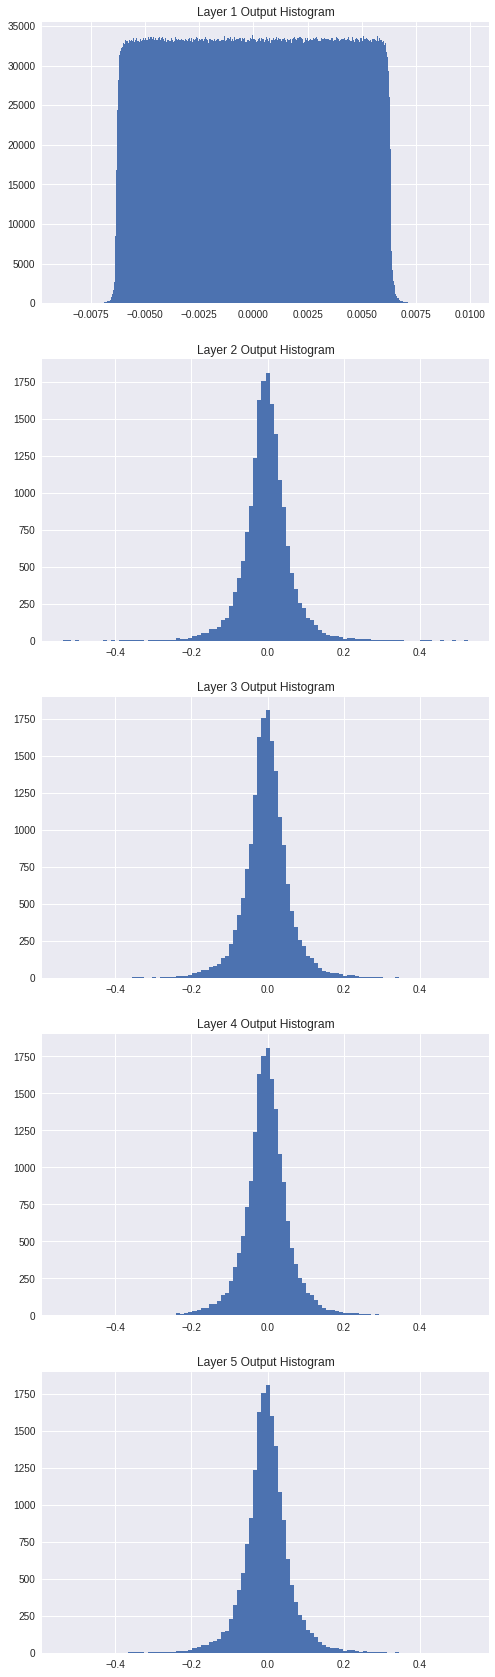

In [120]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(8, 30))

plt.style.use('seaborn-deep')
plt.subplot(5, 1, 1)
plt.hist(list(list(pre_trained_model.parameters())[0].flatten().data.cpu().numpy()),bins=500)
plt.title('Layer 1 Output Histogram')
plt.subplot(5, 1, 2)
plt.hist(list(list(pre_trained_model.parameters())[8].flatten().data.cpu().numpy()),bins=100)
plt.title('Layer 2 Output Histogram')
plt.subplot(5, 1, 3)
plt.hist(list(list(pre_trained_model.parameters())[8].flatten().data.cpu().numpy()),bins=100)
plt.title('Layer 3 Output Histogram')
plt.subplot(5, 1, 4)
plt.hist(list(list(pre_trained_model.parameters())[8].flatten().data.cpu().numpy()),bins=100)
plt.title('Layer 4 Output Histogram')
plt.subplot(5, 1, 5)
plt.hist(list(list(pre_trained_model.parameters())[8].flatten().data.cpu().numpy()),bins=100)
plt.title('Layer 5 Output Histogram')
plt.show()

In [0]:
# list(list(pre_trained_model.parameters())[8].flatten().data.cpu().numpy())

In [0]:
"""
Created on Thu Oct 21 11:09:09 2017
@author: Utku Ozbulak - github.com/utkuozbulak
"""
import os
import copy
import numpy as np
from PIL import Image
import matplotlib.cm as mpl_color_map

import torch
from torch.autograd import Variable
from torchvision import models


def convert_to_grayscale(im_as_arr):
    """
        Converts 3d image to grayscale
    Args:
        im_as_arr (numpy arr): RGB image with shape (D,W,H)
    returns:
        grayscale_im (numpy_arr): Grayscale image with shape (1,W,D)
    """
    grayscale_im = np.sum(np.abs(im_as_arr), axis=0)
    im_max = np.percentile(grayscale_im, 99)
    im_min = np.min(grayscale_im)
    grayscale_im = (np.clip((grayscale_im - im_min) / (im_max - im_min), 0, 1))
    grayscale_im = np.expand_dims(grayscale_im, axis=0)
    return grayscale_im


def save_gradient_images(gradient, file_name):
    """
        Exports the original gradient image
    Args:
        gradient (np arr): Numpy array of the gradient with shape (3, 224, 224)
        file_name (str): File name to be exported
    """
    if not os.path.exists('../results'):
        os.makedirs('../results')
    # Normalize
    gradient = gradient - gradient.min()
    gradient /= gradient.max()
    # Save image
    path_to_file = os.path.join('../results', file_name + '.jpg')
    save_image(gradient, path_to_file)


def save_class_activation_images(org_img, activation_map, file_name):
    """
        Saves cam activation map and activation map on the original image
    Args:
        org_img (PIL img): Original image
        activation_map (numpy arr): Activation map (grayscale) 0-255
        file_name (str): File name of the exported image
    """
    if not os.path.exists('../results'):
        os.makedirs('../results')
    # Grayscale activation map
    heatmap, heatmap_on_image = apply_colormap_on_image(org_img, activation_map, 'hsv')
    # Save colored heatmap
    path_to_file = os.path.join('../results', file_name+'_Cam_Heatmap.png')
    save_image(heatmap, path_to_file)
    # Save heatmap on iamge
    path_to_file = os.path.join('../results', file_name+'_Cam_On_Image.png')
    save_image(heatmap_on_image, path_to_file)
    # SAve grayscale heatmap
    path_to_file = os.path.join('../results', file_name+'_Cam_Grayscale.png')
    save_image(activation_map, path_to_file)


def apply_colormap_on_image(org_im, activation, colormap_name):
    """
        Apply heatmap on image
    Args:
        org_img (PIL img): Original image
        activation_map (numpy arr): Activation map (grayscale) 0-255
        colormap_name (str): Name of the colormap
    """
    # Get colormap
    color_map = mpl_color_map.get_cmap(colormap_name)
    no_trans_heatmap = color_map(activation)
    # Change alpha channel in colormap to make sure original image is displayed
    heatmap = copy.copy(no_trans_heatmap)
    heatmap[:, :, 3] = 0.4
    heatmap = Image.fromarray((heatmap*255).astype(np.uint8))
    no_trans_heatmap = Image.fromarray((no_trans_heatmap*255).astype(np.uint8))

    # Apply heatmap on iamge
    heatmap_on_image = Image.new("RGBA", org_im.size)
    heatmap_on_image = Image.alpha_composite(heatmap_on_image, org_im.convert('RGBA'))
    heatmap_on_image = Image.alpha_composite(heatmap_on_image, heatmap)
    return no_trans_heatmap, heatmap_on_image


def save_image(im, path):
    """
        Saves a numpy matrix of shape D(1 or 3) x W x H as an image
    Args:
        im_as_arr (Numpy array): Matrix of shape DxWxH
        path (str): Path to the image
    """
    if isinstance(im, np.ndarray):
        if len(im.shape) == 2:
            im = np.expand_dims(im, axis=0)
        if im.shape[0] == 1:
            # Converting an image with depth = 1 to depth = 3, repeating the same values
            # For some reason PIL complains when I want to save channel image as jpg without
            # additional format in the .save()
            im = np.repeat(im, 3, axis=0)
            # Convert to values to range 1-255 and W,H, D
        if im.shape[0] == 3:
            im = im.transpose(1, 2, 0) * 255
        im = Image.fromarray(im.astype(np.uint8))
    im.save(path)


def preprocess_image(pil_im, resize_im=True):
    """
        Processes image for CNNs
    Args:
        PIL_img (PIL_img): Image to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (torch variable): Variable that contains processed float tensor
    """
    # mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    # Resize image
    if resize_im:
        pil_im.thumbnail((512, 512))
    im_as_arr = np.float32(pil_im)
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var


def recreate_image(im_as_var):
    """
        Recreates images from a torch variable, sort of reverse preprocessing
    Args:
        im_as_var (torch variable): Image to recreate
    returns:
        recreated_im (numpy arr): Recreated image in array
    """
    reverse_mean = [-0.485, -0.456, -0.406]
    reverse_std = [1/0.229, 1/0.224, 1/0.225]
    recreated_im = copy.copy(im_as_var.data.numpy()[0])
    for c in range(3):
        recreated_im[c] /= reverse_std[c]
        recreated_im[c] -= reverse_mean[c]
    recreated_im[recreated_im > 1] = 1
    recreated_im[recreated_im < 0] = 0
    recreated_im = np.round(recreated_im * 255)

    recreated_im = np.uint8(recreated_im).transpose(1, 2, 0)
    return recreated_im


def get_positive_negative_saliency(gradient):
    """
        Generates positive and negative saliency maps based on the gradient
    Args:
        gradient (numpy arr): Gradient of the operation to visualize
    returns:
        pos_saliency ( )
    """
    pos_saliency = (np.maximum(0, gradient) / gradient.max())
    neg_saliency = (np.maximum(0, -gradient) / -gradient.min())
    return pos_saliency, neg_saliency


def get_example_params(example_index):
    """
        Gets used variables for almost all visualizations, like the image, model etc.
    Args:
        example_index (int): Image id to use from examples
    returns:
        original_image (numpy arr): Original image read from the file
        prep_img (numpy_arr): Processed image
        target_class (int): Target class for the image
        file_name_to_export (string): File name to export the visualizations
        pretrained_model(Pytorch model): Model to use for the operations
    """
    # Pick one of the examples
    example_list = (('../input_images/snake.jpg', 56),
                    ('../input_images/cat_dog.png', 243),
                    ('../input_images/spider.png', 72))
    img_path = example_list[example_index][0]
    target_class = example_list[example_index][1]
    file_name_to_export = img_path[img_path.rfind('/')+1:img_path.rfind('.')]
    # Read image
    original_image = Image.open(img_path).convert('RGB')
    # Process image
    prep_img = preprocess_image(original_image)
    # Define model
    pretrained_model = models.alexnet(pretrained=True)
    return (original_image,
            prep_img,
            target_class,
            file_name_to_export,
            pretrained_model)

# Feature Maps are plotted below

In [292]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
%matplotlib inline
# load the model
model = pre_trained_model
# load an image from file
image1 = load_img('cat.1.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image2 = img_to_array(image1)
# reshape data for the model
image3 = image2.reshape((1, image2.shape[0], image2.shape[1], image2.shape[2]))
# prepare the image for the VGG model
image4 = preprocess_input(image3)
import os
import numpy as np
# import cv2
# from cv2 import cv
# from opencv.cv import *
import torch
from torch.optim import Adam
from torchvision import models

# from misc_functions import preprocess_image, recreate_image, save_image


class CNNLayerVisualization():
    """
        Produces an image that minimizes the loss of a convolution
        operation for a specific layer and filter
    """
    def __init__(self, model, selected_layer, selected_filter):
        self.model = model
        self.model.eval()
        self.selected_layer = selected_layer
        self.selected_filter = selected_filter
        self.conv_output = 0
        # Create the folder to export images if not exists
        if not os.path.exists('../generated'):
            os.makedirs('../generated')

    def hook_layer(self):
        def hook_function(module, grad_in, grad_out):
            # Gets the conv output of the selected filter (from selected layer)
            self.conv_output = grad_out[0, self.selected_filter]
        # Hook the selected layer
        self.model[self.selected_layer].register_forward_hook(hook_function)
    def loader(path, batch_size=8, num_workers=4, pin_memory=True):
        normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        return data.DataLoader(
          datasets.ImageFolder(path,
                     transforms.Compose([
                       transforms.Resize(256),
                       transforms.RandomResizedCrop(224),
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       normalize,
                     ])))
      
      
      
      
    def visualise_layer_with_hooks(self):
        # Hook the selected layer
        p='inactive'
        self.hook_layer()
        output=[]
        # Generate a random image
        print(type(np.uint8(np.random.uniform(150, 180, (224, 224, 3)))))
        image_path="cat.11.jpg"
#         im=cv2.imread(image_path)
#         im = cv.LoadImage(image_path)
#         random_image = np.asarray(im)
        # Process image and return variable
#         processed_image = loader("drive/My Drive/Colab Notebooks/test")
#         print(processed_image)
        # Define optimizer for the image
        print(type(tf.convert_to_tensor(image4)))
        optimizer = Adam([torch.tensor(np.absolute(image4))], lr=0.1, weight_decay=1e-6)
#         optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        
        for i in range(1, 31):
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = preprocess_image(image1)
            for index, layer in enumerate(self.model):
                # Forward pass layer by layer
                # x is not used after this point because it is only needed to trigger
                # the forward hook function
                x = layer(x.type(torch.cuda.FloatTensor))
#                 x=torch.autograd.Variable(x.type(torch.cuda.FloatTensor))
                # Only need to forward until the selected layer is reached
                self.conv_output = x[0, self.selected_filter]
                output.append(self.conv_output)
                
                if index == self.selected_layer:
                    # (forward hook function triggered)
                    p='active'
                    break
            
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            if(p=='active'):
              return output
        return output
      
      
      
      
    def visualise_layer_without_hooks(self):
        # Process image and return variable
        # Generate a random image
        im = cv.LoadImage("cat.11.jpg")
        random_image = numpy.asarray(im)
#         random_image = np.uint8(np.random.uniform(150, 180, (224, 224, 3)))
        # Process image and return variable
        processed_image = preprocess_image(random_image, False)
        # Define optimizer for the image
        optimizer = Adam([processed_image], lr=0.1, weight_decay=1e-6)
        ouput=[]
        for i in range(1, 31):
            
            optimizer.zero_grad()
            # Assign create image to a variable to move forward in the model
            x = processed_image
            print("X is : ",x)
            for index, layer in enumerate(self.model):
                # Forward pass layer by layer
                x = layer(x)
                if index == self.selected_layer:
                    # Only need to forward until the selected layer is reached
                    # Now, x is the output of the selected layer
                    break
                  
            # Here, we get the specific filter from the output of the convolution operation
            # x is a tensor of shape 1x512x28x28.(For layer 17)
            # So there are 512 unique filter outputs
            # Following line selects a filter from 512 filters so self.conv_output will become
            # a tensor of shape 28x28
            self.conv_output = x[0, self.selected_filter]
            # Loss function is the mean of the output of the selected layer/filter
            # We try to minimize the mean of the output of that specific filter
            loss = -torch.mean(self.conv_output)
            print('Iteration:', str(i), 'Loss:', "{0:.2f}".format(loss.cpu().data.numpy()))
            # Backward
            loss.backward()
            # Update image
            optimizer.step()
            
if __name__ == '__main__':
    cnn_layer = 16
    filter_pos = 5
    # Fully connected layer is not needed
    pretrained_model = pre_trained_model.features
    layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)

    # Layer visualization with pytorch hooks
    output=layer_vis.visualise_layer_with_hooks()

    # Layer visualization without pytorch hooks
#     layer_vis.visualise_layer_without_hooks()

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [0]:
# list(list(pre_trained_model.parameters())[8].flatten().data.cpu().numpy())

In [0]:
# output

In [175]:
!pip install cv


  Could not find a version that satisfies the requirement cv (from versions: )
No matching distribution found for cv


In [171]:
!pip install cv


  Could not find a version that satisfies the requirement cv (from versions: )
No matching distribution found for cv


In [185]:
!pwd

/content


In [251]:
len(output[].flatten())

120736

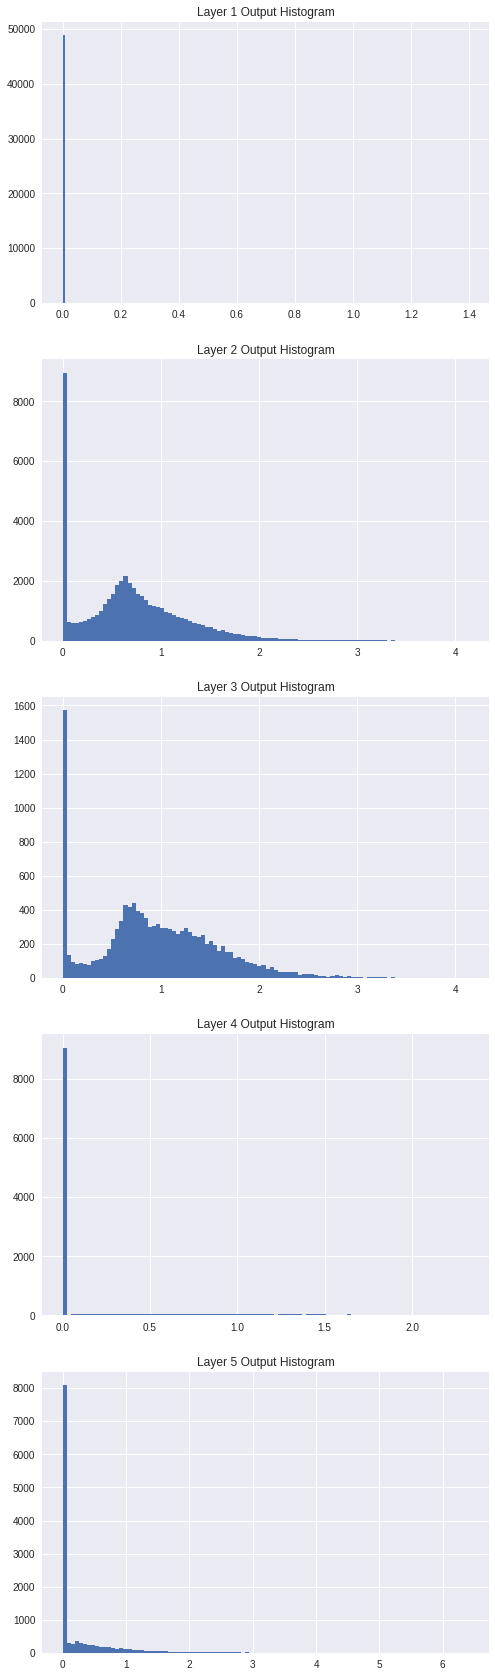

In [303]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(8, 30))
plt.style.use('seaborn-deep')
plt.subplot(5, 1, 1)
plt.hist(list(list(output[0].flatten().data.cpu().numpy())),bins=200)
plt.title('Layer 1 Output Histogram')
plt.subplot(5, 1, 2)
plt.hist(list(list(output[2].flatten().data.cpu().numpy())),bins=100)
plt.title('Layer 2 Output Histogram')
plt.subplot(5, 1, 3)
plt.hist(list(list(output[4].flatten().data.cpu().numpy())),bins=100)
plt.title('Layer 3 Output Histogram')
plt.subplot(5, 1, 4)
plt.hist(list(list(output[6].flatten().data.cpu().numpy())),bins=100)
plt.title('Layer 4 Output Histogram')
plt.subplot(5, 1, 5)
plt.hist(list(list(output[8].flatten().data.cpu().numpy())),bins=100)
plt.title('Layer 5 Output Histogram')
plt.show()